In [1]:
import fitsio
import numpy as np
f = fitsio.read('focusdata.fits')

In [2]:
from matplotlib import pyplot as plt
from table import LUT_table #this is what does LUT interpolation, AJR made fixes to nearest neighbor finding
mt = (f['TTRUTSBT']+f['TTRUTSMT']+f['TTRUTSTT'])/3. #the temperatures used for autofocus
af = -8400+(7.-mt)*110 #the autofocus equation
lut = LUT_table('20190415frommartinilut_v2.txt') #Look up table
'''
make array with focus values from LUT
'''
zlut = np.zeros(len(af))
for i in range(0,len(f)):
    zlut[i] = lut.interpolate_delaunay(f[i]['MOUNTAZ'],f[i]['MOUNTEL'])[2] #get values, code reports when uses nearest neighbor

aflut = af -(zlut+8400) #auto focus + look up table, with signs reversed based on analysis below

Loaded 20190415frommartinilut_v2.txt
Replace nan with nearest -2000.0 for element 0
Replace nan with nearest -4000.0 for element 1
Replace nan with nearest -8400.0 for element 2
Replace nan with nearest -100.0 for element 3
Replace nan with nearest 25.0 for element 4
Replace nan with nearest 0.0 for element 5
Replace nan with nearest -1888.45 for element 0
Replace nan with nearest -4088.52 for element 1
Replace nan with nearest -8433.69 for element 2
Replace nan with nearest -107.38 for element 3
Replace nan with nearest 34.31 for element 4
Replace nan with nearest 0.0 for element 5
Replace nan with nearest -1994.26 for element 0
Replace nan with nearest -4142.64 for element 1
Replace nan with nearest -8437.0 for element 2
Replace nan with nearest -111.9 for element 3
Replace nan with nearest 25.48 for element 4
Replace nan with nearest 0.0 for element 5
Replace nan with nearest -2000.0 for element 0
Replace nan with nearest -4000.0 for element 1
Replace nan with nearest -8400.0 for el

/global/u2/a/ajross/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):


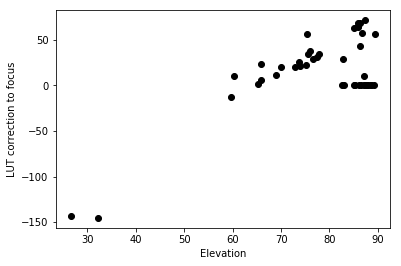

In [3]:
'''
plot elevation vs LUT difference to see that results make sense
points near 90,0 were nearest neighbors to az,el 0,90 and get the fiducial value
'''
plt.plot(f['MOUNTEL'],aflut-af,'ko')
plt.xlabel('Elevation')
plt.ylabel('LUT correction to focus')
plt.show()

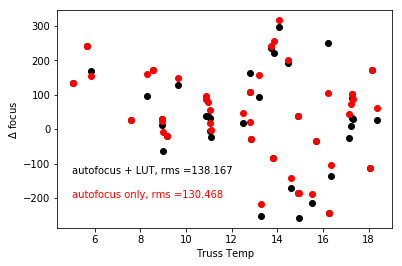

In [4]:
plt.plot(mt,f['focus_C']-aflut,'ko')
rmsl = np.std(f['focus_C']-aflut-np.mean(f['focus_C']-aflut))
plt.text(5,-130,'autofocus + LUT, rms ='+str(np.round(rmsl,3)),color='k')
plt.plot(mt,f['focus_C']-af,'ro')
rmsn = np.std(f['focus_C']-af-np.mean(f['focus_C']-af))
plt.text(5,-200,'autofocus only, rms ='+str(np.round(rmsn,3)),color='r')
plt.xlabel('Truss Temp')
plt.ylabel(r'$\Delta$ focus')
plt.show()